In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tic_env import *

### Question 1

In [2]:
Turns = np.array(['X','O'])
player1 = QPlayer(epsilon=0.1, player=Turns[0])
player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
env1 = QlearningEnv(player1=player1, player2=player2)
env1.train(20000)

Text(0, 0.5, 'avg reward')

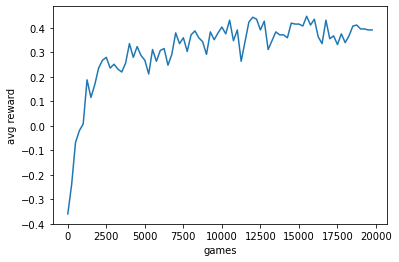

In [3]:
length1=250
lst1 = env1.get_reward(player=1)
x_ticks = range(0, len(lst1), length1)
avg_reward1 = []
for i in range(len(lst1)//length1):
    avg_reward1.append(sum(lst1[i*length1:(i+1)*length1])/length1)
plt.plot(x_ticks, avg_reward1)
plt.xlabel(f'games')
plt.ylabel('avg reward')

### Question 2

In [4]:
Turns = np.array(['X','O'])
training_reward_lists = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env2 = QlearningEnv(player1=player1, player2=player2)
    env2.set_decay_eps(epoch_star=epoch_star)
    env2.train(20000)
    training_reward_lists.append(env2.get_reward(player=1))

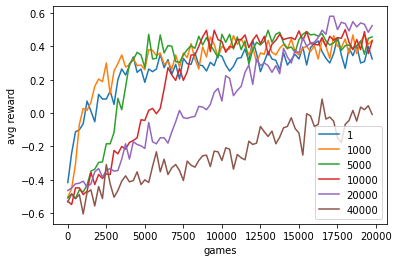

In [5]:
length1=250
x_ticks = range(0, len(training_reward_lists[0]), length1)
for j in range(len(epoch_stars)):
    avg_reward1 = []
    for i in range(len(training_reward_lists[0])//length1):
        avg_reward1.append(sum(training_reward_lists[j][i*length1:(i+1)*length1])/length1)
    plt.plot(x_ticks, avg_reward1, label=str(epoch_stars[j]))
    plt.xlabel(f'games')
    plt.ylabel('avg reward')
plt.legend()

### Question 3

In [6]:
Turns = np.array(['X','O'])
test_reward_lists_random_3 = []
test_reward_lists_optimal_3 = []
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=epoch_star)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_3.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_3.append(env3.test_avg_reward['optimal'])

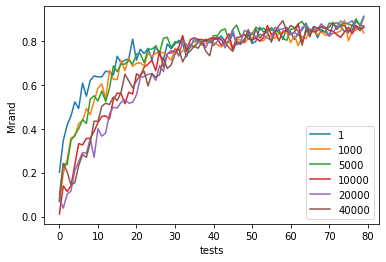

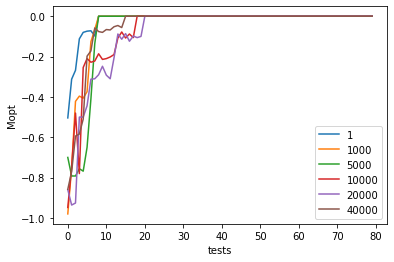

In [7]:
# M_rand
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_random_3[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mrand')
plt.legend()

# M_opt
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_optimal_3[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mopt')
plt.legend()

### Question 4

In [8]:
Turns = np.array(['X','O'])
best_epoch_star = 20000
test_reward_lists_random_4 = []
test_reward_lists_optimal_4 = []
test_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
for test_eps in test_epses:
    player1 = QPlayer(epsilon=0.2, player=Turns[0])
    player2 = OptimalPlayer(epsilon=0.5, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_decay_eps(epoch_star=best_epoch_star)
    env3.set_testing(test_eps=test_eps)
    env3.train(20000)
    test_reward_lists_random_4.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_4.append(env3.test_avg_reward['optimal'])

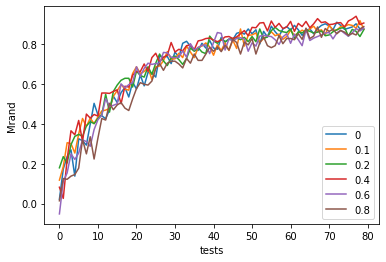

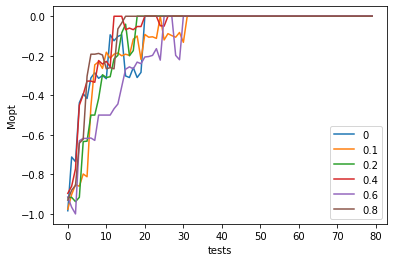

In [9]:
# M_rand
plt.figure()
for j in range(len(test_epses)):
    plt.plot(test_reward_lists_random_4[j], label=str(test_epses[j]))
    plt.xlabel(f'tests')
    plt.ylabel('Mrand')
plt.legend()

# M_opt
plt.figure()
for j in range(len(test_epses)):
    plt.plot(test_reward_lists_optimal_4[j], label=str(test_epses[j]))
    plt.xlabel(f'tests')
    plt.ylabel('Mopt')
plt.legend()

### Question 5

In [18]:
print(max([max(it) for it in test_reward_lists_random_4]))
print(max([max(it) for it in test_reward_lists_optimal_4]))

0.942
0.0


### Question 6
in report

### Question 7

In [11]:
Turns = np.array(['X','O'])
test_reward_lists_random_7 = []
test_reward_lists_optimal_7 = []
train_epses = [0, 0.1, 0.2, 0.4, 0.6, 0.8]
for train_eps in train_epses:
    player1 = QPlayer(epsilon=train_eps, player=Turns[0])
    player2 = QPlayer(epsilon=train_eps, player=Turns[1])
    env3 = QlearningEnv(player1=player1, player2=player2)
    env3.set_testing()
    env3.train(20000)
    test_reward_lists_random_7.append(env3.test_avg_reward['random'])
    test_reward_lists_optimal_7.append(env3.test_avg_reward['optimal'])

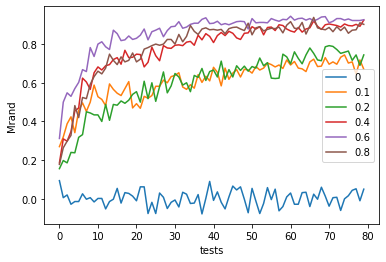

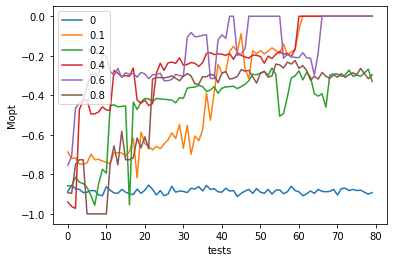

In [12]:
# M_rand
plt.figure()
for j in range(len(train_epses)):
    plt.plot(test_reward_lists_random_7[j], label=str(train_epses[j]))
plt.xlabel(f'tests')
plt.ylabel('Mrand')
plt.legend()

plt.figure()
for j in range(len(train_epses)):
    plt.plot(test_reward_lists_optimal_7[j], label=str(train_epses[j]))
plt.xlabel(f'tests')
plt.ylabel('Mopt')
plt.legend()

### Question 8

In [14]:
Turns = np.array(['X','O'])
test_reward_lists_random_8 = []
test_reward_lists_optimal_8 = []
best_train_eps = 0.6 ## no effect, since we use set_decay_eps
epoch_stars = [1, 1000, 5000, 10000, 20000, 40000]
for epoch_star in epoch_stars:
    player1 = QPlayer(epsilon=best_train_eps, player=Turns[0])
    player2 = QPlayer(epsilon=best_train_eps, player=Turns[1])
    env8 = QlearningEnv(player1=player1, player2=player2)
    env8.set_decay_eps(epoch_star=epoch_star)
    env8.set_testing()
    env8.train(20000)
    test_reward_lists_random_8.append(env8.test_avg_reward['random'])
    test_reward_lists_optimal_8.append(env8.test_avg_reward['optimal'])

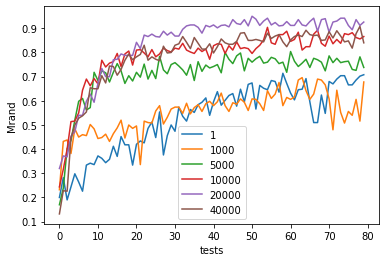

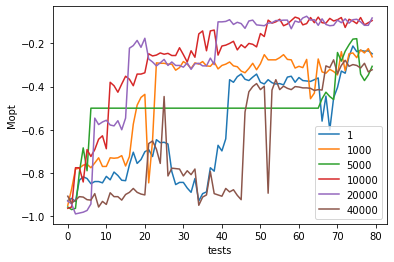

In [15]:
# M_rand
plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_random_8[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mrand')
plt.legend()

plt.figure()
for j in range(len(epoch_stars)):
    plt.plot(test_reward_lists_optimal_8[j], label=str(epoch_stars[j]))
plt.xlabel(f'tests')
plt.ylabel('Mopt')
plt.legend()

### Question 9

In [17]:
print(max([max(it) for it in test_reward_lists_random_8]))
print(max([max(it) for it in test_reward_lists_optimal_8]))

0.95
-0.074


### Question 10

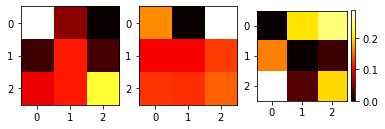

In [32]:
test_env = env8
test_env.reset_all()
def render_Q(grid):
    state = test_env.player1.toState(grid)
    moves = test_env.player1.empty(grid) # use method from Player class
    Q_show = np.zeros((3,3))
    for move in moves:
        Q_show[move] = test_env.Q['Q'][state][move]
    return Q_show

grid1 = np.zeros((3,3))
grid2 = np.zeros((3,3))
grid3 = np.zeros((3,3))

grid2[(1,1)] = 1
grid3[(0,0)] = 1
grid3[(1,1)] = -1

Q_show1 = render_Q(grid1)
Q_show2 = render_Q(grid2)
Q_show3 = render_Q(grid3)


plt.subplot(1, 3, 1)
plt.imshow(Q_show1, cmap='hot')
plt.subplot(1, 3, 2)
plt.imshow(Q_show2, cmap='hot')
plt.subplot(1, 3, 3)
plt.imshow(Q_show3, cmap='hot')

plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

